In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_style("darkgrid")
sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv("CATI_LPK_MASZK_2021_10_hullam_2021_10_compl_20211030_clean_Renyi.csv",
           sep=';',
           header=0)

# Fix data
df = df.replace("Kömlő", "Kömlőd")
df = df.replace("Hódosér (bakonyszentlászló)", "Bakonyszentlászló")

# Merge KSH
KSH = pd.read_csv("HU_places_admin_pop_ZIP_latlon.csv",
           sep=',',
           header=0)
df=pd.merge(df, KSH, left_on="K15A", right_on="place")

# Add central Hungary
pest = ["Budapest"]+["Alsónémedi","Biatorbágy","Budajenő","Budakalász","Budakeszi","Budaörs","Csobánka","Csomád","Csömör","Csörög","Dabas","Délegyháza","Diósd","Dunabogdány","Dunaharaszti","Dunakeszi","Dunavarsány","Ecser","Erdőkertes","Érd","Felsőpakony","Fót","Göd","Gödöllő","Gyál","Gyömrő","Halásztelek","Herceghalom","Inárcs","Isaszeg","Kakucs","Kerepes","Kistarcsa","Kisoroszi","Leányfalu","Majosháza","Maglód","Mogyoród","Monor","Nagykovácsi","Nagytarcsa","Ócsa","Őrbottyán","Páty","Perbál","Pécel","Pilisborosjenő","Piliscsaba","Pilisjászfalu","Pilisszántó","Pilisszentiván","Pilisszentkereszt","Pilisszentlászló","Pilisvörösvár","Pomáz","Pócsmegyer","Pusztazámor","Remeteszőlős","Solymár","Sóskút","Szada","Százhalombatta","Szentendre","Szigethalom","Szigetmonostor","Szigetszentmiklós","Sződ","Sződliget","Tahitótfalu","Taksony","Tárnok","Telki","Tinnye","Tök","Tököl","Törökbálint","Újhartyán","Újlengyel","Üllő","Üröm","Vác","Vácrátót","Vecsés","Veresegyház","Visegrád","Zsámbék"]
no_pest = [k for k in set(df["K15A"].array) if k not in pest]
pest = [k for k in set(df["K15A"].array) if k in pest]

centralHun = pd.DataFrame({
    "central":np.concatenate((np.ones(len(pest), dtype=int), np.zeros(len(no_pest), dtype=int))),
    "K15A":pest+no_pest
})
df=df.merge(centralHun, on="K15A")

# Awareness: Távolságfüggés

3 érdekesség:
* Csak a községnél figyelhető meg, hogy fontosabb, mint a család
* A községekbelieknek fontosabb, mi történik a világban, mint Európában
* Vidékieknek fontosabb az országos adat, mint a főváros. És fordítva is

In [3]:
distance_dep = {
    "Közeli ismerős":"K91_01",
    "Lakóhely":"K91_02",
    "Megye":"K91_03",
    "Főváros":"K91_05",
    "Ország":"K91_06",
    "Európa":"K91_08",
    "Világ":"K91_09",
}

distance_dep_bp = dict(distance_dep)
del distance_dep_bp["Megye"]

size_dep = {
    "Közeli ismerős":"K91_01",
    "Lakóhely":"K91_02",
    "Közeli nagyváros":"K91_04",
    "Főváros":"K91_05",
}

def plot_distance_dep(criterions, labels, title):
    N = len(distance_dep)
    plt.figure(figsize=(10,7))
    
    for label,criterion in zip(labels, criterions):
        dist_group = [df[criterion].groupby([key])['súly'].sum() for key in distance_dep.values()]
        plt.plot(range(N), [np.average(x.index, weights=x.array) for x in dist_group], label=label)
        #mean=[np.average(x.index, weights=x.array) for x in dist_group]
        #err=[np.sqrt(np.cov(x.index, aweights=x.array)) for x in dist_group]
        #plt.errorbar(range(N), mean, yerr = err, label=label, fmt='-o')
        
    plt.xticks(range(N), labels=distance_dep.keys(), rotation=45, ha='right');
    plt.legend()
    plt.ylabel("Awareness")
    plt.title(title)
    plt.show()
    
def plot_distance_dep2(criterions1, criterions2, labels, title):
    N = len(distance_dep)
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,2,1)
    for label,criterion in zip(labels, criterions1):
        dist_group = [df[criterion].groupby([key])['súly'].sum() for key in distance_dep.values()]
        plt.plot(range(N), [np.average(x.index, weights=x.array) for x in dist_group], label=label)
        
    plt.xticks(range(N), labels=distance_dep.keys(), rotation=45, ha='right');
    plt.legend()
    plt.title(title+" (noBP)")
    
    
    plt.subplot(1,2,2)
    for label,criterion in zip(labels, criterions2):
        dist_group = [df[criterion].groupby([key])['súly'].sum() for key in distance_dep_bp.values()]
        plt.plot(range(N-1), [np.average(x.index, weights=x.array) for x in dist_group], label=label)
        
    plt.xticks(range(N-1), labels=distance_dep_bp.keys(), rotation=45, ha='right');
    plt.legend()
    plt.title(title+" (BP)")
    
    plt.show()
    
def plot_size_dep(criterions, labels, title):
    N = len(size_dep)
    plt.figure(figsize=(8,7))
    
    for label,criterion in zip(labels, criterions):
        dist_group = [df[criterion].groupby([key])['súly'].sum() for key in size_dep.values()]
        plt.plot(range(N), [np.average(x.index, weights=x.array) for x in dist_group], label=label)
        
    plt.xticks(range(N), labels=size_dep.keys(), rotation=45, ha='right');
    plt.legend()
    plt.title(title)
    plt.show()

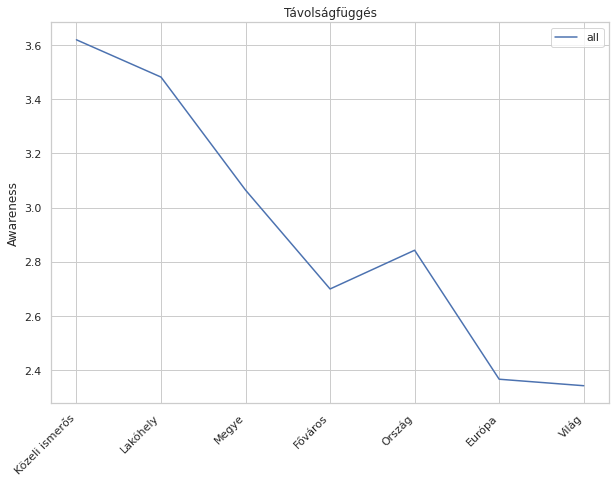

In [4]:
#labels = ["all", "Budapest", "vidék"]
#criterions = [df["súly"]>0, df["K15A"]=="Budapest", df["K15A"]!="Budapest"]
labels = ["all"]
criterions = [df["súly"]>0]
plot_distance_dep(criterions, labels, "Távolságfüggés")

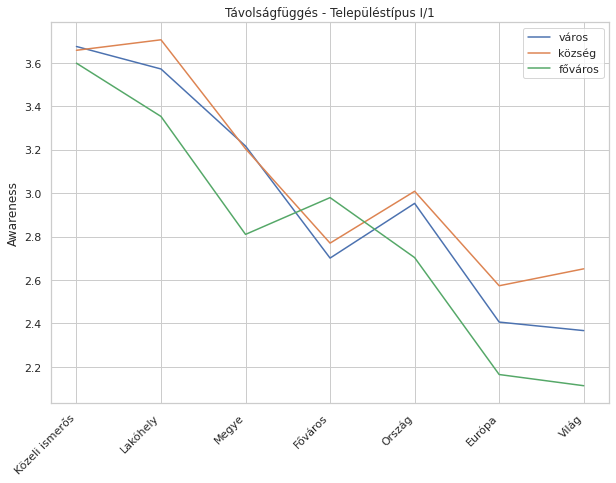

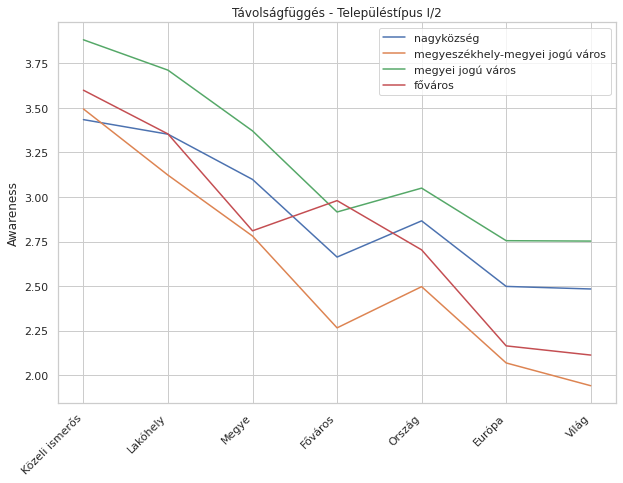

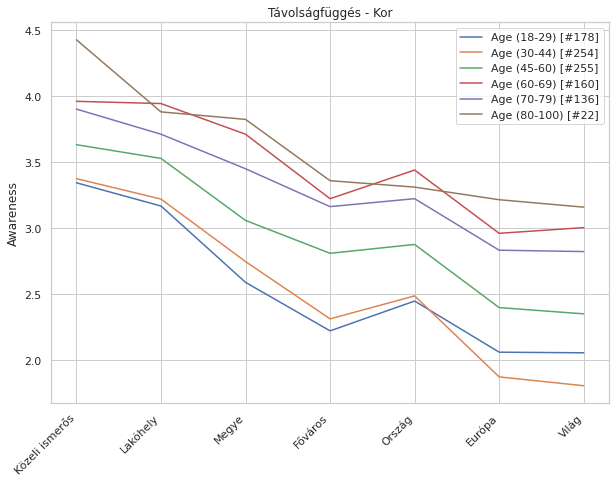

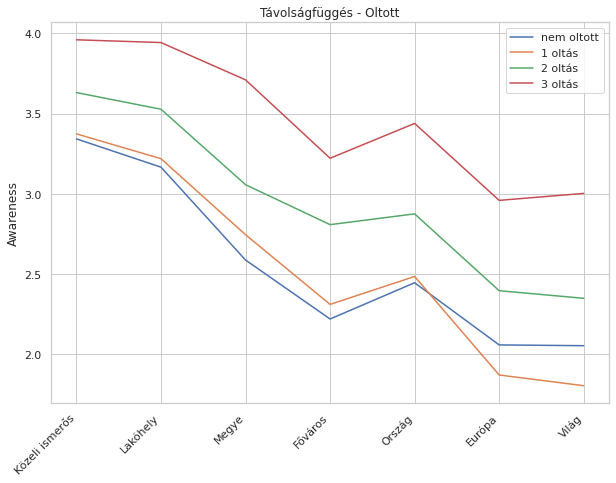

In [5]:
labels = ["város", "község", "főváros"]
criterions = [df["settlement type"]==ctype for ctype in labels]
plot_distance_dep(criterions, labels, "Távolságfüggés - Településtípus I/1")

labels = ["nagyközség", "megyeszékhely-megyei jogú város", "megyei jogú város", "főváros"]
criterions = [df["settlement type"]==ctype for ctype in labels]
plot_distance_dep(criterions, labels, "Távolságfüggés - Településtípus I/2")

age_arr = [(18,29), (30,44),(45, 60), (60,69), (70,79), (80,100)]
criterions = [(df["SZUL"]>=a) & (df["SZUL"]<=b) for a,b in age_arr]
labels = [f"Age ({a}-{b}) [#{len(df[c])}]" for (a,b),c in zip(age_arr, criterions)]
plot_distance_dep(criterions, labels, "Távolságfüggés - Kor")

labels = ["nem oltott", "1 oltás", "2 oltás", "3 oltás"]
criterion = [df["K24"]==2, df["K25_1"]==1, df["K25_1"]==2, df["K25_1"]==3]
plot_distance_dep(criterions, labels, "Távolságfüggés - Oltott")

# Méretfüggés

Tanulságok:
* Budapestieknek fontosabb Budapest (A lakóhelyet kisebb környezetnek gondolják)
* Budapesten kevésbé elővigyázatosak
* Idősebbek és oltottak jobban elővigyázatosak

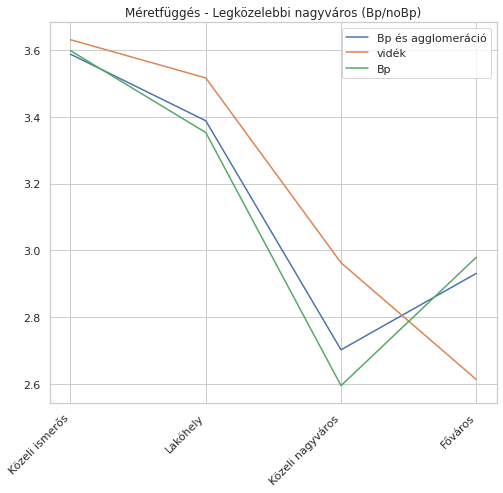

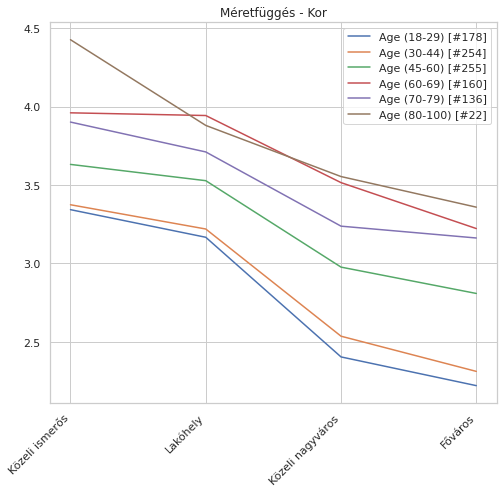

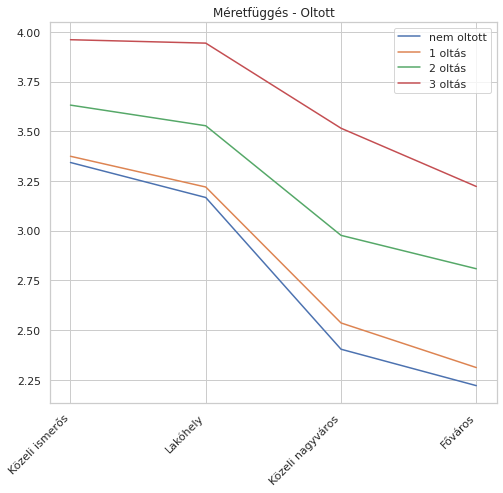

In [6]:
labels = ["Bp és agglomeráció", "vidék", "Bp"]
criterions = [df["central"]==ctype for ctype in [1,0]]+[df["K15A"]=="Budapest"]
plot_size_dep(criterions, labels, "Méretfüggés - Legközelebbi nagyváros (Bp/noBp)")

age_arr = [(18,29), (30,44),(45, 60), (60,69), (70,79), (80,100)]
criterions = [(df["SZUL"]>=a) & (df["SZUL"]<=b) for a,b in age_arr]
labels = [f"Age ({a}-{b}) [#{len(df[c])}]" for (a,b),c in zip(age_arr, criterions)]
plot_size_dep(criterions, labels, "Méretfüggés - Kor")

labels = ["nem oltott", "1 oltás", "2 oltás", "3 oltás"]
criterion = [df["K24"]==2, df["K25_1"]==1, df["K25_1"]==2, df["K25_1"]==3]
plot_size_dep(criterions, labels, "Méretfüggés - Oltott")

# Bp - noBp 

* Nagyon érdekes, hogy a Budapesti fiatalok mindennél/mindenkinél jobban félnek a lakóhelyükön történő fertőzéstől

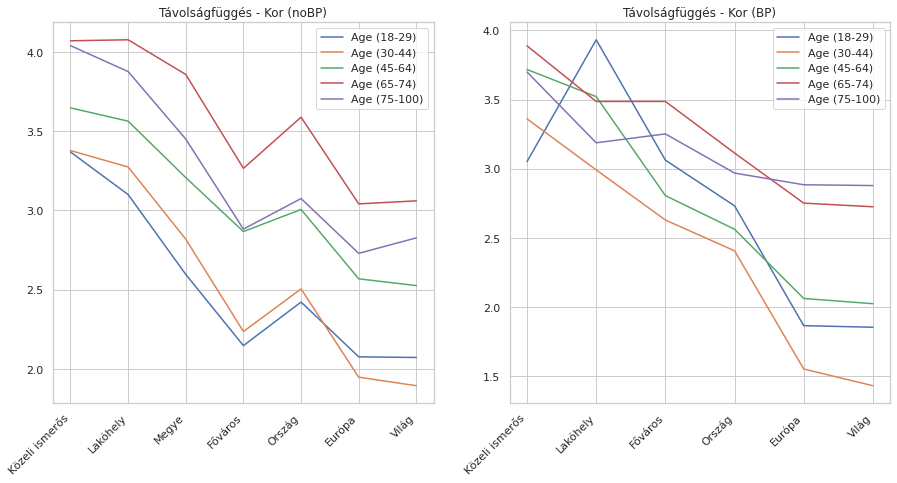

In [7]:
age_arr = [(18,29), (30,44),(45, 64), (65,74), (75,100)]
criterions1 = [(df["SZUL"]>=a) & (df["SZUL"]<=b) & (df["K15A"]!="Budapest") for a,b in age_arr]
criterions2 = [(df["SZUL"]>=a) & (df["SZUL"]<=b) & (df["K15A"]=="Budapest") for a,b in age_arr]
labels = [f"Age ({a}-{b})" for (a,b),c in zip(age_arr, criterions1)]
plot_distance_dep2(criterions1, criterions2, labels, "Távolságfüggés - Kor")

In [8]:
for a,b in age_arr:
    num = len(df[(df["SZUL"]>=a) & (df["SZUL"]<=b) & (df["K15A"]!="Budapest")])
    print(f"People in age ({a},{b}) (noBp): {num}")

print("=================")
for a,b in age_arr:
    num = len(df[(df["SZUL"]>=a) & (df["SZUL"]<=b) & (df["K15A"]=="Budapest")])
    print(f"People in age ({a},{b}) (Bp): {num}")

People in age (18,29) (noBp): 164
People in age (30,44) (noBp): 205
People in age (45,64) (noBp): 251
People in age (65,74) (noBp): 148
People in age (75,100) (noBp): 52
People in age (18,29) (Bp): 14
People in age (30,44) (Bp): 49
People in age (45,64) (Bp): 54
People in age (65,74) (Bp): 37
People in age (75,100) (Bp): 26


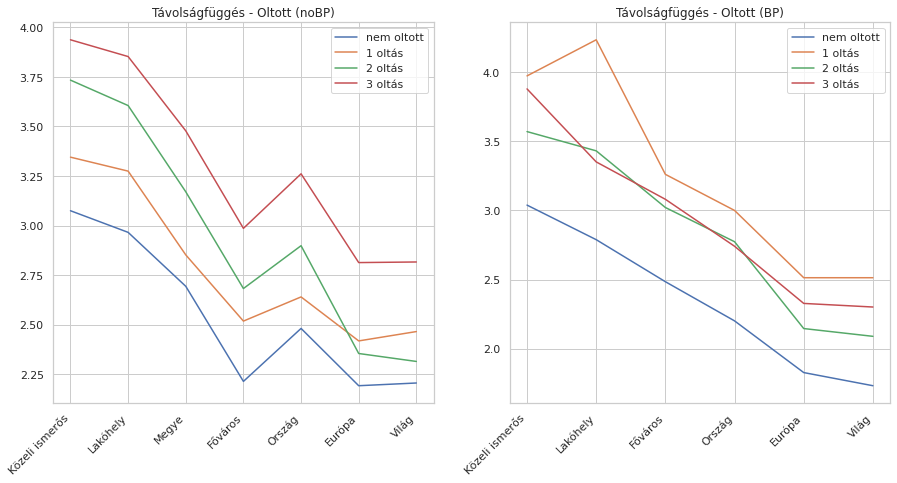

In [9]:
labels = ["nem oltott", "1 oltás", "2 oltás", "3 oltás"]
criterion1 = [(df["K24"]==2) & (df["K15A"]!="Budapest"), (df["K25_1"]==1) & (df["K15A"]!="Budapest"),
             (df["K25_1"]==2) & (df["K15A"]!="Budapest"), (df["K25_1"]==3)& (df["K15A"]!="Budapest")]
criterion2 = [(df["K24"]==2) & (df["K15A"]=="Budapest"), (df["K25_1"]==1) & (df["K15A"]=="Budapest"),
             (df["K25_1"]==2) & (df["K15A"]=="Budapest"), (df["K25_1"]==3)& (df["K15A"]=="Budapest")]
plot_distance_dep2(criterion1, criterion2, labels, "Távolságfüggés - Oltott")

In [10]:
for label,crit in zip(labels, criterion1):
    print(f"{label}: #{len(df[crit])} (noBP)")

print("=================")
for label,crit in zip(labels, criterion2):
    print(f"{label}: #{len(df[crit])} (BP)")

nem oltott: #166 (noBP)
1 oltás: #27 (noBP)
2 oltás: #471 (noBP)
3 oltás: #156 (noBP)
nem oltott: #21 (BP)
1 oltás: #4 (BP)
2 oltás: #107 (BP)
3 oltás: #48 (BP)


In [11]:
df[(df["K25_1"]==1) & (df["K15A"]=="Budapest")][["SZUL", "isk","nem", "K91_01", "K91_02", "K91_03"]]

,SZUL,isk,nem,K91_01,K91_02,K91_03
147,47,2,1,3,3,3
148,72,1,2,3,4,4
164,44,3,1,5,5,4
222,24,3,2,5,5,3


In [12]:
num_f, num_no=len(df[df["nem"]==1]), len(df[df["nem"]==2])
print(f"#Férfi: {num_f}\n#Nő:    {num_no}")

#Férfi: 470
#Nő:    530


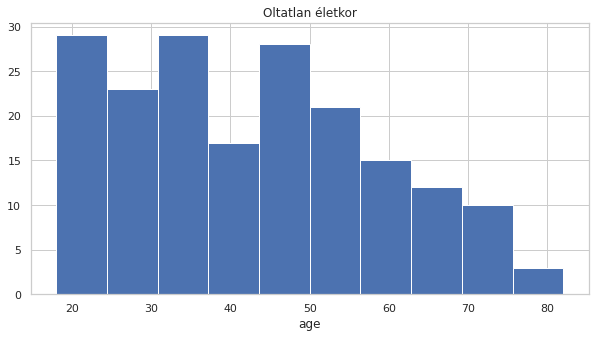

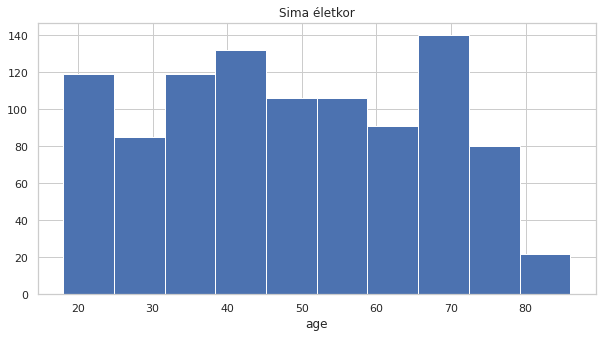

In [13]:
oltatlan=df[df["K24"]==2]

plt.figure(figsize=(10,5))
(2021-oltatlan['K1']).hist()
plt.xlabel("age")
plt.title("Oltatlan életkor")
plt.show()

plt.figure(figsize=(10,5))
(2021-df['K1']).hist()
plt.xlabel("age")
plt.title("Sima életkor")
plt.show()


In [14]:
labels = ["nagyközség", "megyeszékhely-megyei jogú város", "megyei jogú város", "főváros"]
criterions = [df["settlement type"]==ctype for ctype in labels]
#plot_distance_dep(criterions, labels, "Távolságfüggés - Településtípus I/2")

for crit,label in zip(criterions, labels):
    print(label, len(df[crit]))

nagyközség 59
megyeszékhely-megyei jogú város 174
megyei jogú város 37
főváros 180


In [38]:
def plot_size_dep(criterions, labels, title, size):
    N = len(size_dep)
    plt.figure(figsize=size)
    
    for label,criterion in zip(labels, criterions):
        dist_group = [df[criterion].groupby([key])['súly'].sum() for key in size_dep.values()]
        plt.plot(range(N), [np.average(x.index, weights=x.array) for x in dist_group], label=label)
        
    plt.xticks(range(N), labels=size_dep.keys(), rotation=45, ha='right');
    plt.legend()
    plt.title(title)
    plt.show()
    
size_dep = {
    "Közeli ismerős":"K91_01",
    "Lakóhely":"K91_02",
    "Megye":"K91_03",
    "Ország":"K91_06",
}

In [39]:
d = dict(df.groupby("admin county").size())

<Figure size 432x288 with 0 Axes>

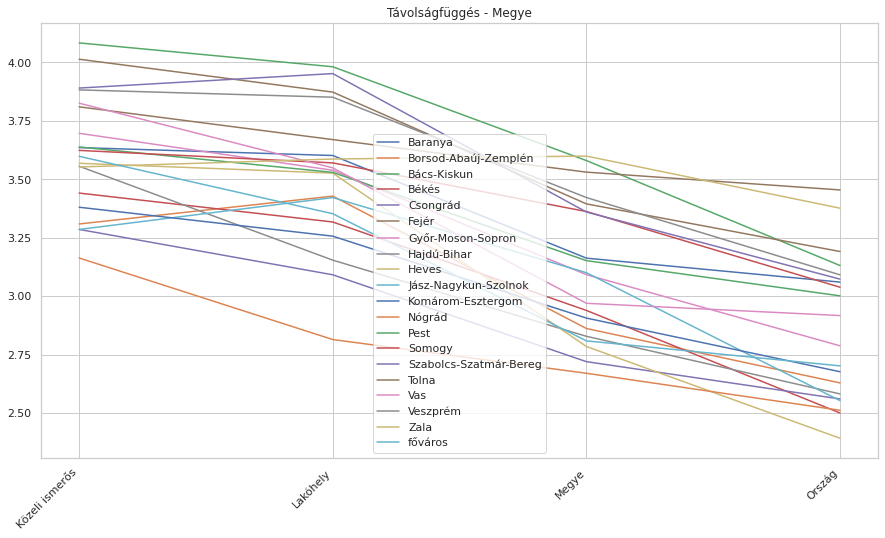

In [45]:
plt.figure()
labels = list(d.keys())

criterions = [df["admin county"]==d for d in labels]
plot_size_dep(criterions, labels, "Távolságfüggés - Megye", size=(15,8))

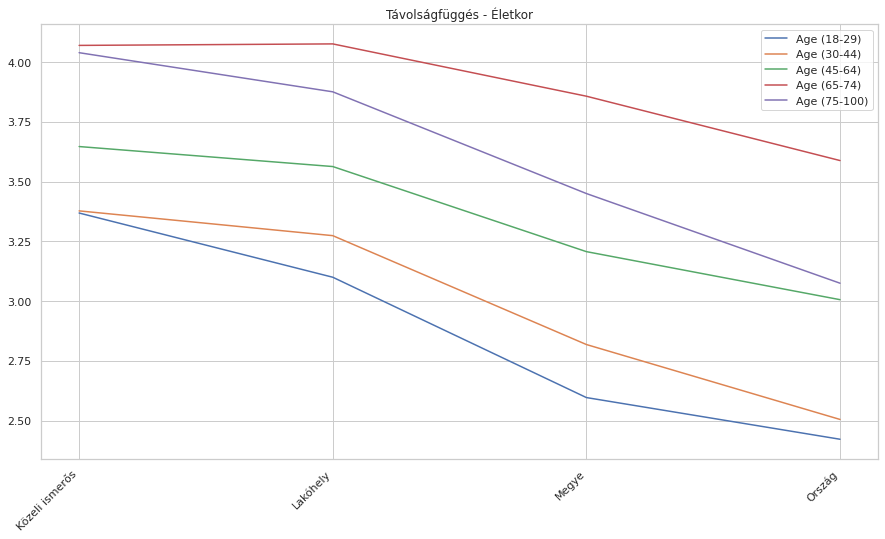

In [46]:
age_arr = [(18,29), (30,44),(45, 64), (65,74), (75,100)]
criterions = [(df["SZUL"]>=a) & (df["SZUL"]<=b) & (df["K15A"]!="Budapest") for a,b in age_arr]
labels = [f"Age ({a}-{b})" for (a,b),c in zip(age_arr, criterions)]

plot_size_dep(criterions, labels, "Távolságfüggés - Életkor", size=(15,8))

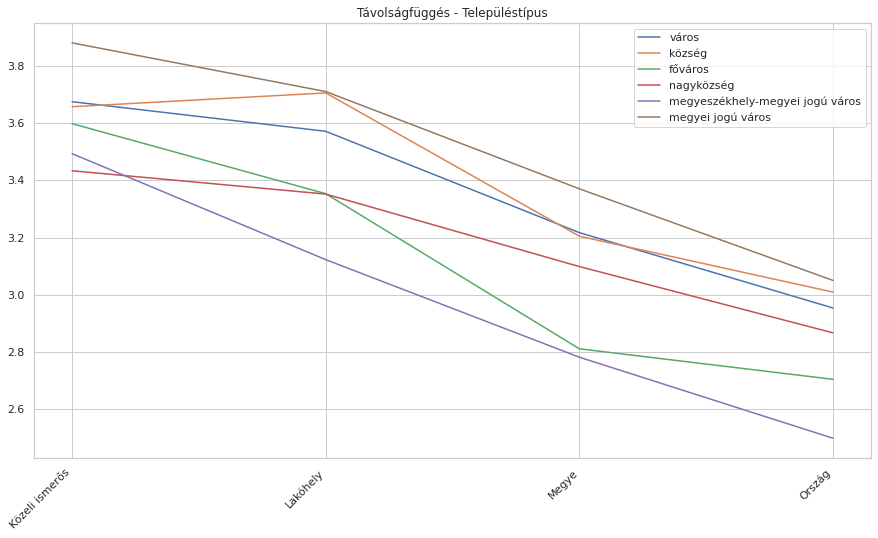

In [50]:
labels = ["város", "község", "főváros", "nagyközség", "megyeszékhely-megyei jogú város", "megyei jogú város"]
criterions = [df["settlement type"]==ctype for ctype in labels]
plot_size_dep(criterions, labels, "Távolságfüggés - Településtípus", size=(15,8))



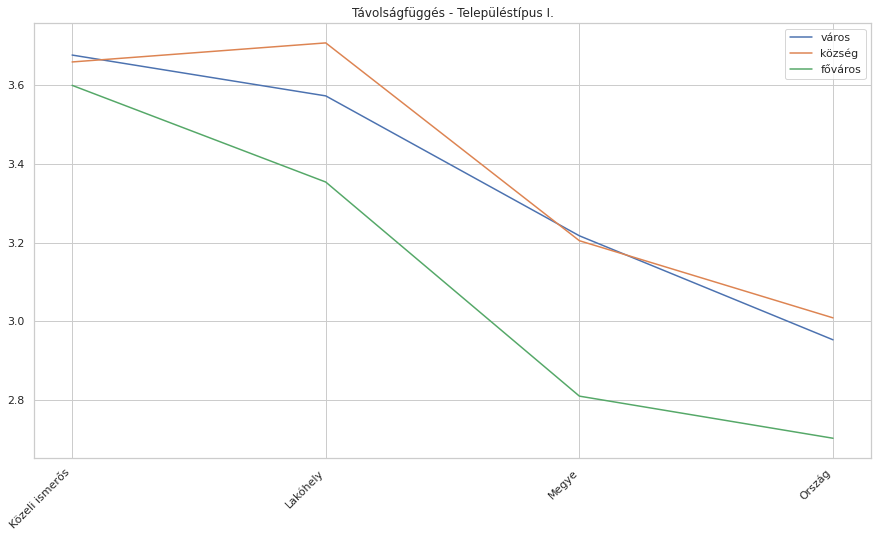

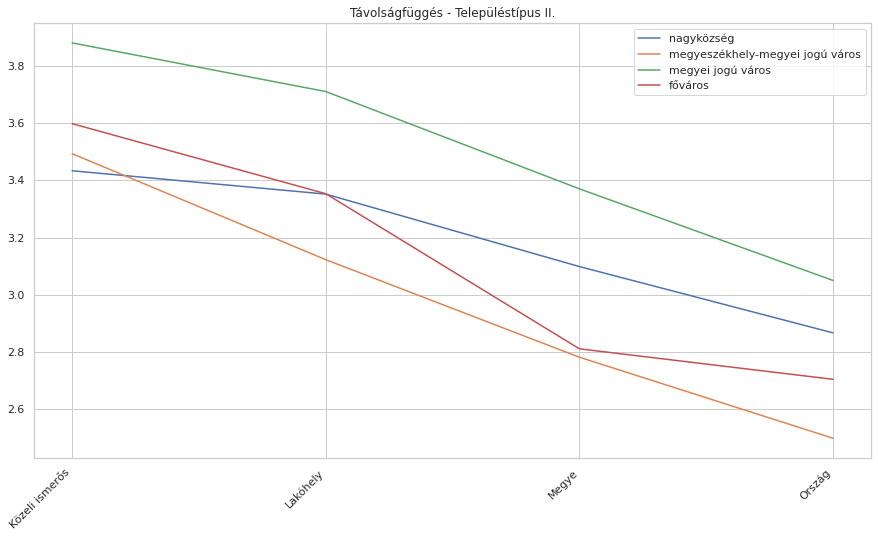

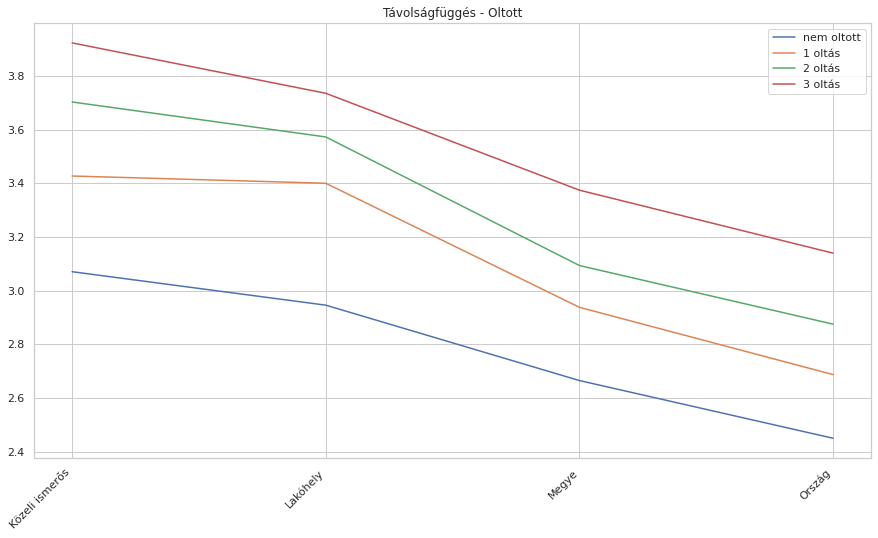

In [48]:
labels = ["város", "község", "főváros"]
criterions = [df["settlement type"]==ctype for ctype in labels]
plot_size_dep(criterions, labels, "Távolságfüggés - Településtípus I.", size=(15,8))

labels = ["nagyközség", "megyeszékhely-megyei jogú város", "megyei jogú város", "főváros"]
criterions = [df["settlement type"]==ctype for ctype in labels]
plot_size_dep(criterions, labels, "Távolságfüggés - Településtípus II.", size=(15,8))


labels = ["nem oltott", "1 oltás", "2 oltás", "3 oltás"]
criterions = [df["K24"]==2, df["K25_1"]==1, df["K25_1"]==2, df["K25_1"]==3]
plot_size_dep(criterions, labels, "Távolságfüggés - Oltott", size=(15,8))